In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importando o dataset

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

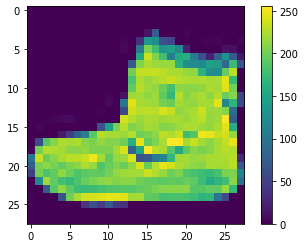

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

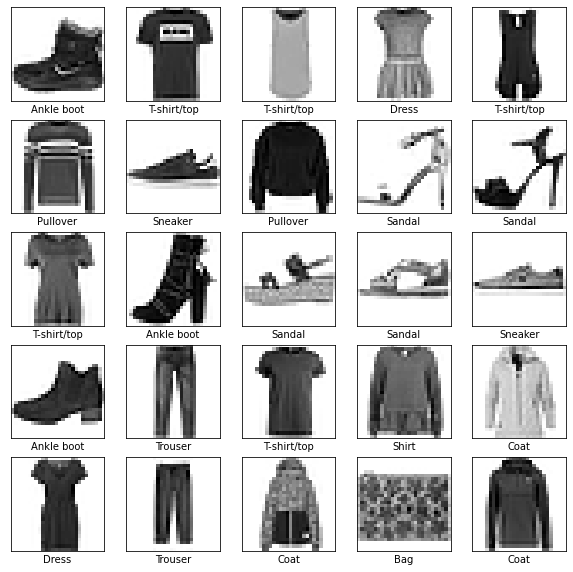

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
#treinando o modelo

model.fit(train_images, train_labels, epochs=10)

#avaliando acurácia
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Acurácia: {test_acc}')
print(f'Loss: {test_loss}')


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 3.5597 - accuracy: 0.7173
Epoch 2/10
1875/1875 [==============================] - 2s 830us/step - loss: 0.6674 - accuracy: 0.7659
Epoch 3/10
1875/1875 [==============================] - 1s 717us/step - loss: 0.5730 - accuracy: 0.7918
Epoch 4/10
1875/1875 [==============================] - 1s 723us/step - loss: 0.5319 - accuracy: 0.8085
Epoch 5/10
1875/1875 [==============================] - 1s 698us/step - loss: 0.5126 - accuracy: 0.8197
Epoch 6/10
1875/1875 [==============================] - 2s 810us/step - loss: 0.4909 - accuracy: 0.8288
Epoch 7/10
1875/1875 [==============================] - 2s 838us/step - loss: 0.4906 - accuracy: 0.8306
Epoch 8/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.4790 - accuracy: 0.8355
Epoch 9/10
1875/1875 [==============================] - 1s 719us/step - loss: 0.4710 - accuracy: 0.8368
Epoch 10/10
1875/1875 [==============================] - 1s 792us/

In [10]:
#Make Predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([5.8623618e-38, 1.3481574e-37, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.0073652e-01, 0.0000000e+00, 4.2951837e-01,
       5.1283811e-16, 2.6974511e-01], dtype=float32)

In [11]:
np.argmax(predictions[0])

7

In [12]:
test_labels[0]

9

In [13]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

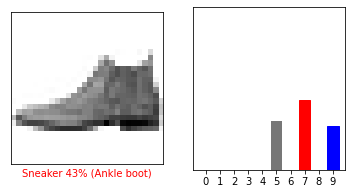

In [14]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

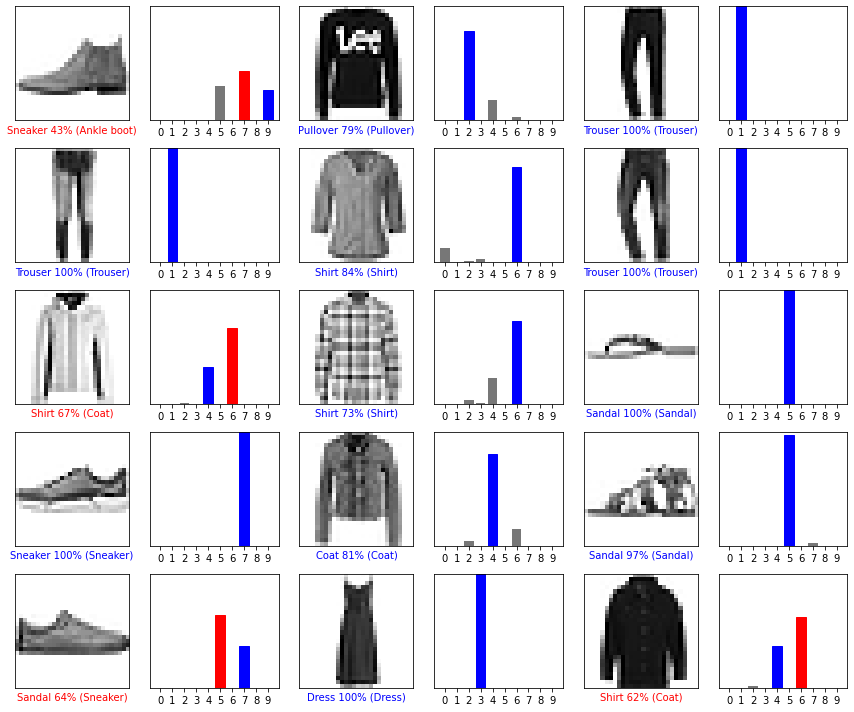

In [15]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()